# Signal analysis Assignment 3
## Duty 3
by Øystein Hiåsen (hiasen@stud.ntnu.no)

The pulses from assignment 2 duty 2 can be found at
https://bitbucket.org/hiasen/signalanalyse_2015/raw/master/assignment3/pulse_signals.py.

In [1]:
# This file depends the on following libraries
# as well as a python version >= 3.4
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import scipy.signal as signal
%matplotlib inline

In [2]:
# Import the pulses from assignment 2 duty2 
# which I have put in its own python-script called pulse_signals.py
from pulse_signals import (
    sample_frequency,
    time,
    rectangular_pulse, # a rectangular pulse of length 10 ms and amplitude 1 centred around time t = 1s.
    triangular_pulse, # a triangular pulse of length 10 ms and amplitude 1 centred around time t = 1s.
    gaussian_pulse, # a Gaussian pulse of width 3ms and amplitude 7 centred around time t = 1s.
    sequence_of_rect_pulses #a sequence of 11 rectangular pulses of width 1ms separated by 9 ms starting at t = 1s
)
N = len(time)
fs = sample_frequency
dt = 1/fs

# Create a zero-centered frequency vector used for plotting
f = np.linspace(0, fs, N) - fs/2
print("Sample frequency {} Hz".format(sample_frequency))

Sample frequency 10000.0 Hz


In [3]:
from enum import Enum
p = Enum("Pulse", "rect tri gauss seq")
pulses = dict(zip(p, [rectangular_pulse, triangular_pulse, gaussian_pulse, sequence_of_rect_pulses]))
names = dict(zip(p, ["rectangular pulse", "triangular pulse", "gaussian pulse", "sequence of rectangular pulses"]))

# Compute the ffts
ffts = {key: fftpack.fft(pulses[key]) for key in p}

assert len(f) == len(ffts[p.rect])
# Scale the ffts with the sample frequency and shift so they are "zero-centered"
shifted_and_scaled_ffts = {key: fftpack.fftshift(ffts[key])/fs for key in p}

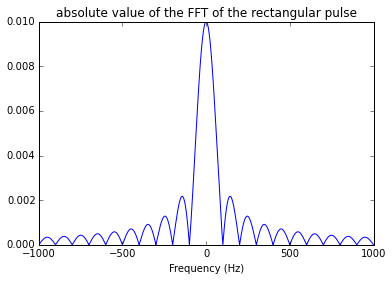

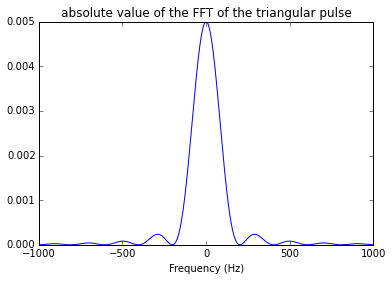

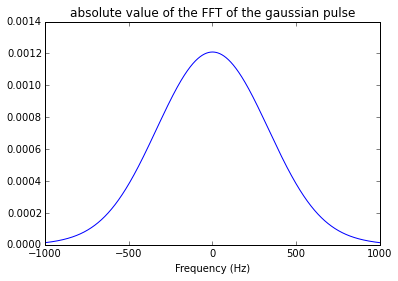

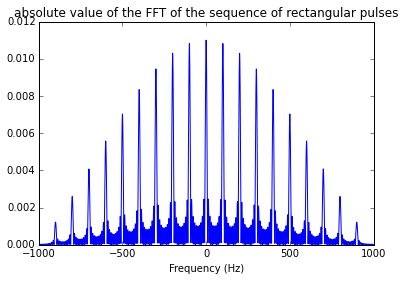

In [4]:
for key in p:
    plt.figure()
    plt.title("absolute value of the FFT of the {}".format(names[key]))
    plt.plot(f, np.abs(shifted_and_scaled_ffts[key]))
    plt.xlim([-1000, 1000])
    plt.xlabel("Frequency (Hz)")

## Comparison with analytic FT of the rectangular pulse

Now we find the analytical fourier transform to the rectangular pulse
$$\mathrm{rect}(\alpha(t-t_0))$$
which is a shifted and time-scaled version of the rectangle-function $\mathrm{rect}(t)$

The fourier transform of the rectangle function is
$$\mathcal{F}\{ \mathrm{rect}(t)\} = \mathrm{sinc}{(\omega/\pi)}$$
where
$$\mathrm{sinc}(x) = \frac{\sin{\pi x}}{\pi x}$$
is the normalized sinc-function.

Some fourier transfoms  used to find the 
$$\mathcal{F}\{ f(t)\} = F(\omega)$$
$$\mathcal{F}\{ f(t-t_0)\} = F(\omega) e^{-j\omega t_0}$$
$$\mathcal{F}\{ f(\alpha t)\} = \frac{1}{|\alpha|} F\left(\frac{\omega}{\alpha}\right)$$

$\mathcal{F}\{\mathrm{rect}(\alpha(t-t_0))\} = \frac{1}{|\alpha|} \mathrm{sinc}(\frac{\omega}{\pi \alpha}) e^{-j\omega t_0}$

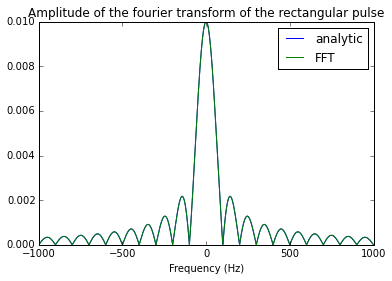

In [5]:
# The parameters of the rectangle pulse
alpha = 1/10e-3
t0 = 1
analytical_fft_rectangle = 1/alpha*np.sinc(f/alpha)*np.exp(-2j*np.pi*f*t0)

plt.title("Amplitude of the fourier transform of the rectangular pulse")
plt.plot(f, np.abs(analytical_fft_rectangle), label="analytic")
plt.plot(f, np.abs(shifted_and_scaled_ffts[p.rect]), label="FFT")
plt.xlim([-1000, 1000])
plt.xlabel("Frequency (Hz)")
plt.legend()

The fft and the analytic fourier transform seem to fit well.

## 2. - Convolution of the rectangular pulse with the gaussian pulse

In [6]:
import time as time_module
t1 = time_module.time()
direct_convolution = signal.convolve(pulses[p.seq],
                                     pulses[p.gauss])
t2 = time_module.time()
mul_ft = fftpack.ifft(fftpack.fft(pulses[p.seq]) *
                      fftpack.fft(pulses[p.gauss])
                     )
t3 = time_module.time()

direct_time = t2-t1
fft_time = t3-t2
print(direct_time, fft_time)

21.23452925682068 0.004401206970214844


Sum of absolute difference: 6.088350305600731e-12


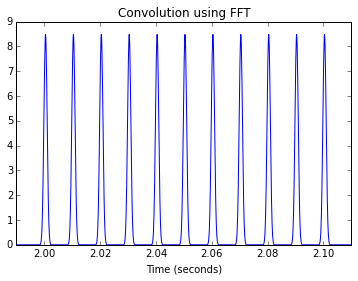

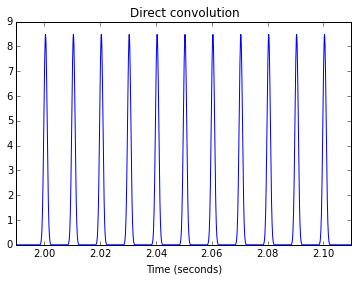

In [7]:
def new_fig(title):
    plt.figure()
    plt.title(title)
    plt.xlim([1.99, 2.11])
    plt.ylim([0, 9])
    plt.xlabel("Time (seconds)")

new_fig("Convolution using FFT")
plt.plot(time, mul_ft.real)
new_fig("Direct convolution")
plt.plot(time, direct_convolution[:N])

sum_of_abs_difference = np.abs(direct_convolution[:N] - mul_ft.real).sum()
print("Sum of absolute difference: {}".format(sum_of_abs_difference))

The direct convolution and the convolution using fft gives the same results but the one using fft is much faster.

In [8]:
print("convolution using fft is {} times faster than direct convolution".format(int(direct_time/fft_time)))

convolution using fft is 4824 times faster than direct convolution
